<a href="https://colab.research.google.com/github/betobye/1TIAPR/blob/main/Aula1_Pipeline_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introdução**

- Defina o Problema a ser resolvido
- Relevância do problema
- Como será resolvido


A detecção de fraudes em transações com cartão de crédito é um desafio crítico para instituições financeiras e empresas, devido ao impacto financeiro significativo e à ameaça à segurança dos consumidores. Com o aumento contínuo do volume de transações eletrônicas, métodos tradicionais de análise e monitoramento tornam-se insuficientes para identificar rapidamente comportamentos suspeitos.

Nesse contexto, modelos de machine learning emergem como ferramentas essenciais, pois são capazes de analisar grandes volumes de dados em tempo real, identificar padrões complexos e adaptar-se a novas estratégias de fraude. A aplicação desses modelos contribui para a redução de perdas financeiras, melhora a experiência do cliente ao minimizar falsos positivos e fortalece a segurança do sistema de pagamentos como um todo.

# **2.Coleta de dados**

- Fonte de Dados: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

- **Descreva as informações da base de dados:**

    * distance_from_home - a distância da casa onde a transação ocorreu.

    * distance_from_last_transaction - a distância desde a última transação.

    * ratio_to_median_purchase_price - Razão entre o preço de transação comprado e o preço de compra mediano.

    * repeat_retailer - A transação ocorreu no mesmo varejista.

    * used_chip - É a transação através de chip (cartão de crédito).

    * used_pin_number - A transação ocorreu usando um número PIN.

    * online_order - A transação é um pedido online.

    * fraude - A transação é fraudulenta.

In [ ]:
#Instalando as bibliotecas de interesse
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn

In [ ]:
import pandas as pd #processamento de dataset
import numpy as np #manipulação algebricas
import matplotlib.pyplot as plt #visualização de dados
import seaborn as sns #visualização de dados

In [ ]:
#importando o banco de dados e salvando no objeto df
df = pd.read_csv("/content/card_transdata.csv")

In [ ]:
#visualizando as 6 primeiras linhas do dataset
df.head(6)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0


In [ ]:
#visualizando as 7 ultimas linhas
df.tail(7)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999993,4.846253,2.844450,0.867740,1.0,0.0,0.0,1.0,0.0
999994,3.295884,0.085712,0.831991,1.0,0.0,0.0,1.0,0.0
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Todas as informações são numéricas decimais

# **3. Análise de Dados**

- Quais perguntas queremos responder?
- Existe dados faltantes
- Existes dados duplicados
- Relação da Target com as features

In [ ]:
#analise descritivas das colunas, trazendo media, desvio padrao e mediana, etc
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum() #analisando quantos dados faltantes

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [ ]:
df.duplicated().sum() #analisando quantos dados duplicados

np.int64(0)

In [ ]:
!pip uninstall -y numpy sweetviz
!pip install numpy==1.26.4 sweetviz

Found existing installation: numpy 2.3.3
Uninstalling numpy-2.3.3:
  Successfully uninstalled numpy-2.3.3
Found existing installation: sweetviz 2.3.1
Uninstalling sweetviz-2.3.1:
  Successfully uninstalled sweetviz-2.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
  Using cached sweetviz-2.3.1-py3-none-any.whl.metadata (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 90.6 MB/s eta 0:00:00
Using cached sweetviz-2.3.1-py3-none-any.whl (15.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.7.0 which is incompatible.
bigframes 2.19.0 requires matplotlib>=3.7.1, but you have matplotlib 3.7.0 which is incompatible.
opencv-python-headless 4.12.0.88 requires num

In [ ]:
import sweetviz as sv


# Gerando o relatório analisando os dados com base no target
relatorio = sv.analyze(df, target_feat='fraud')

# Exibindo o relatório em HTML
relatorio.show_html("relatorio_fraude.html")

                                             |          | [  0%]   00:00 -> (? left)

Report relatorio_fraude.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



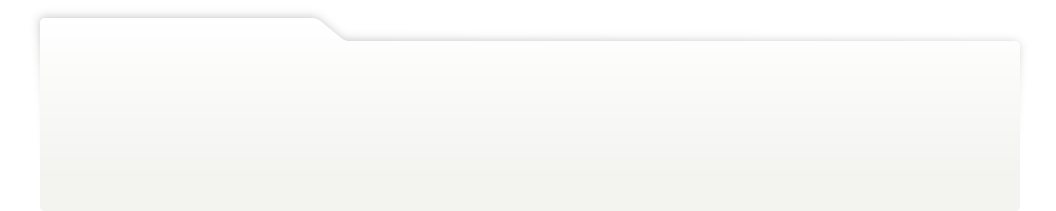
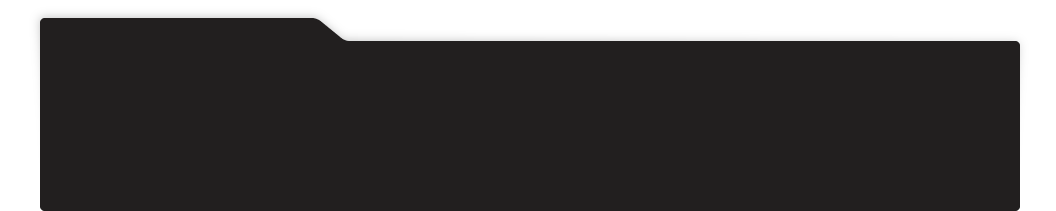
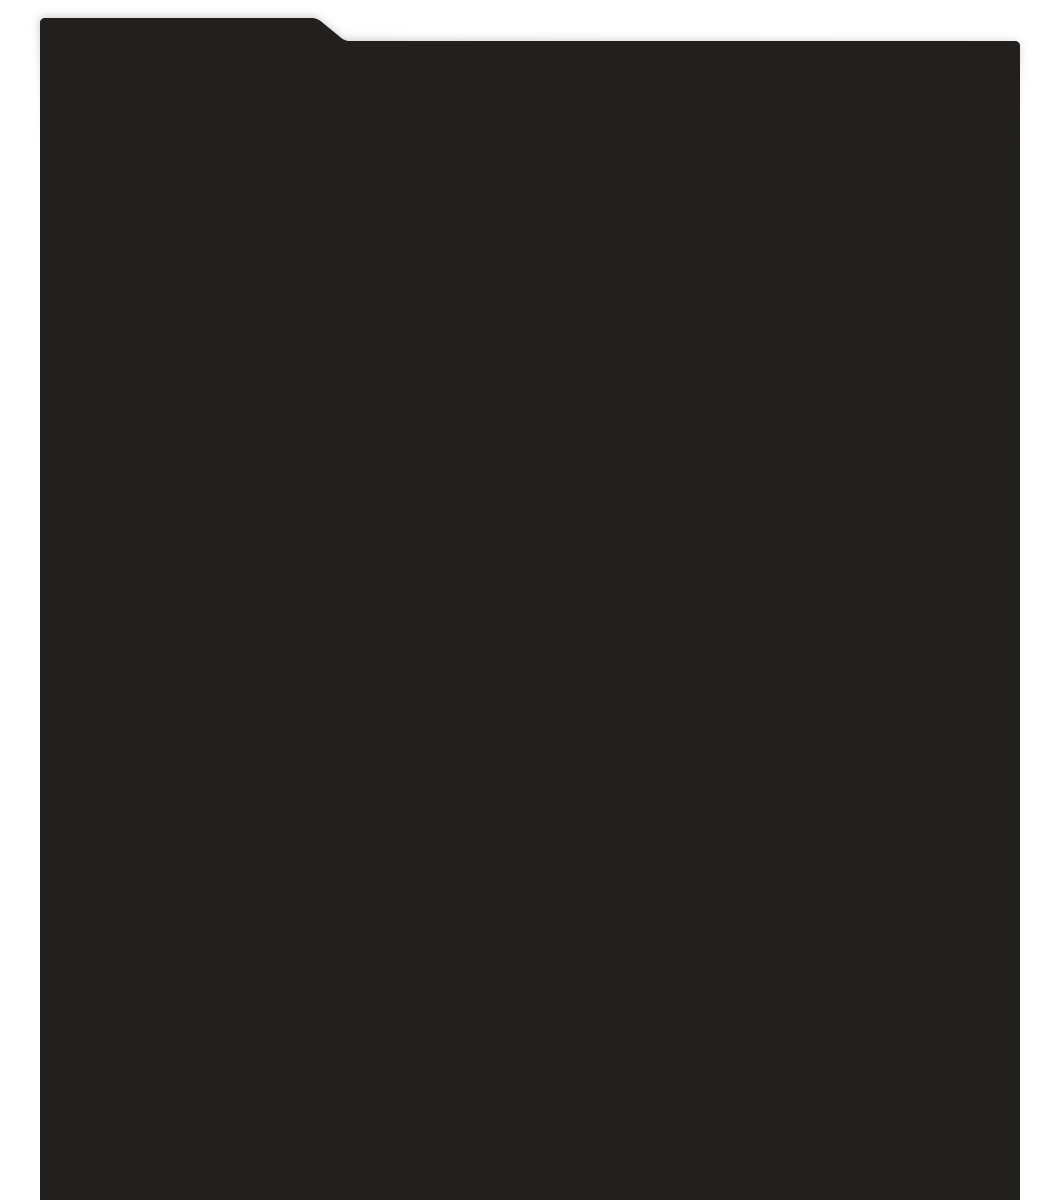
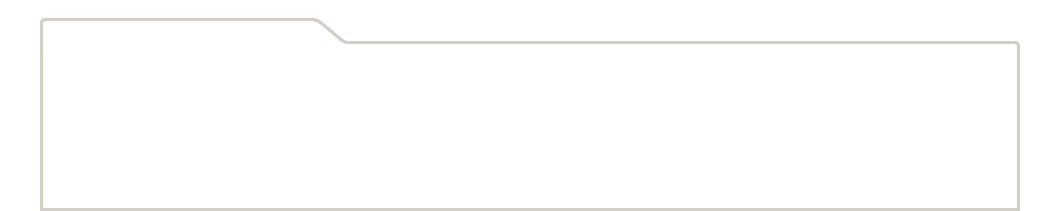
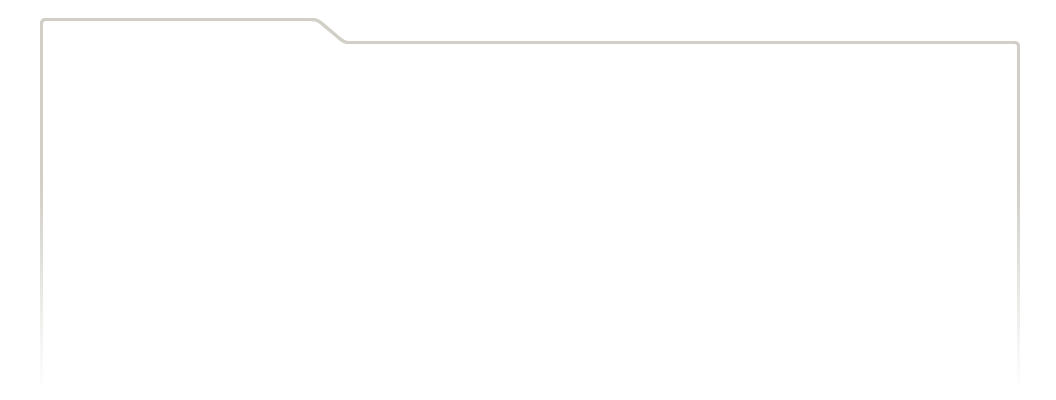
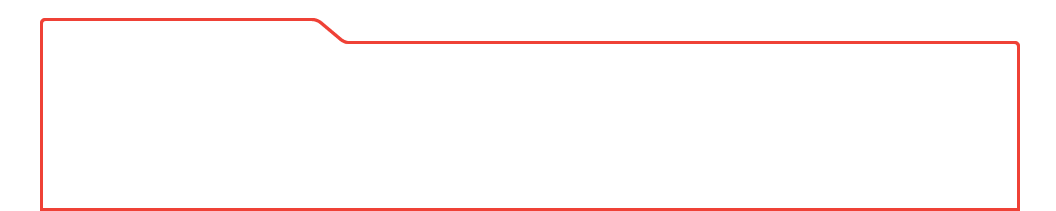
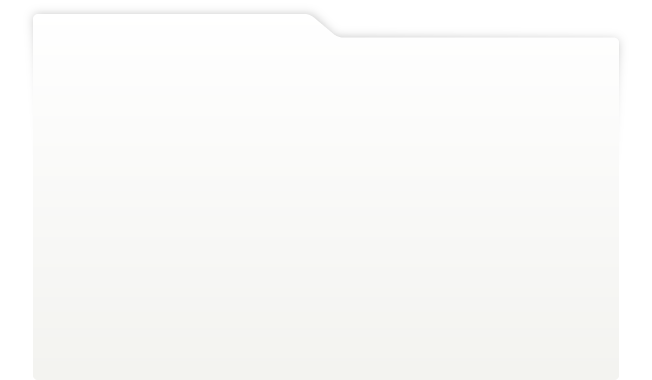
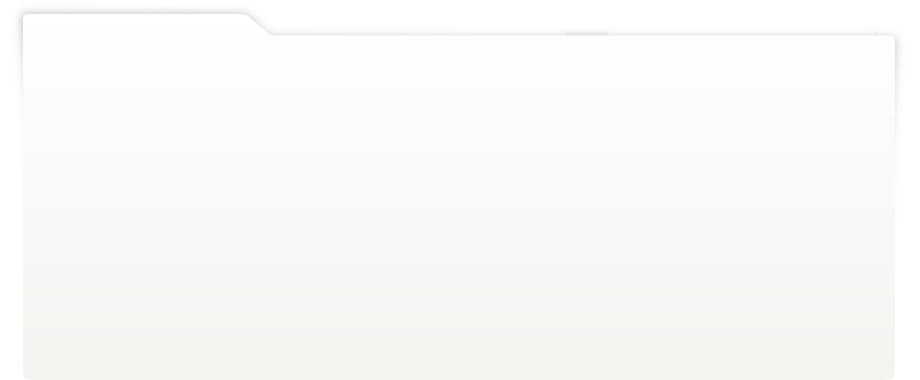
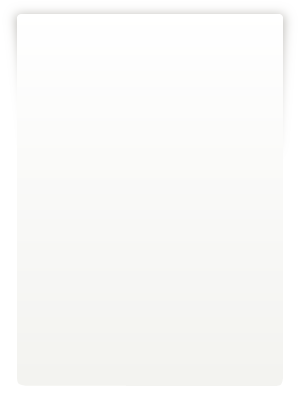
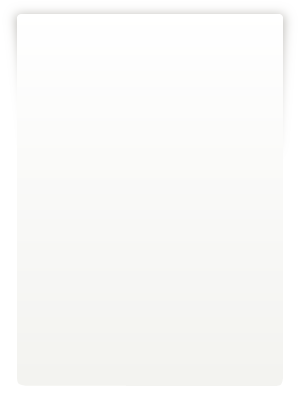
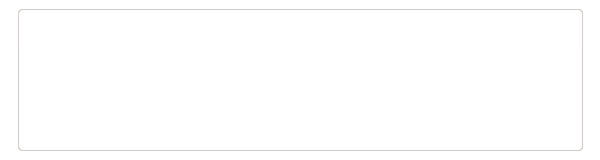
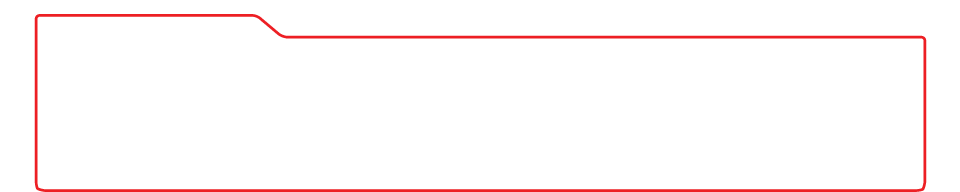
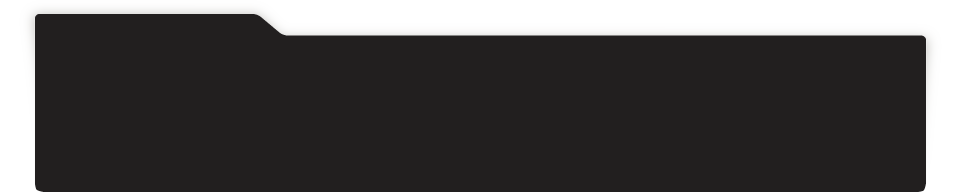
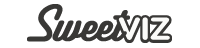
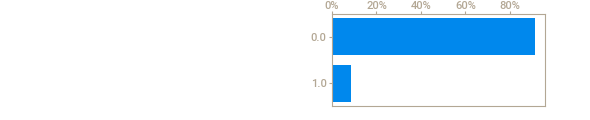
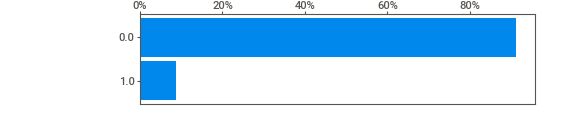
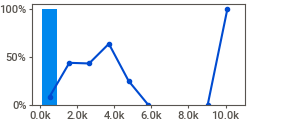
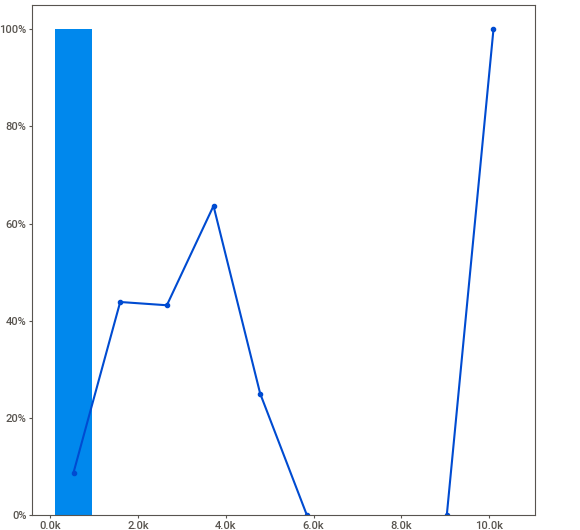
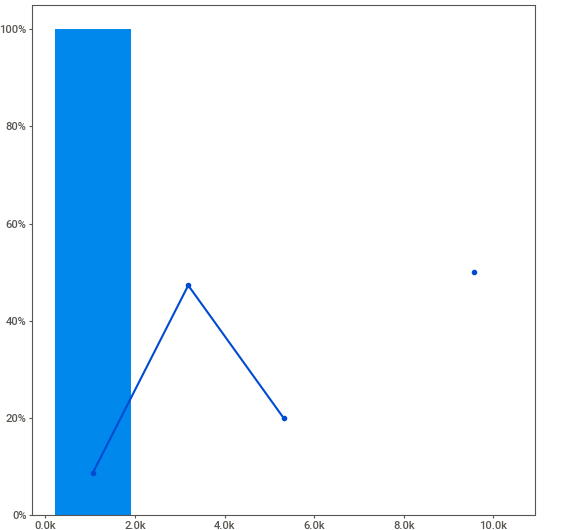
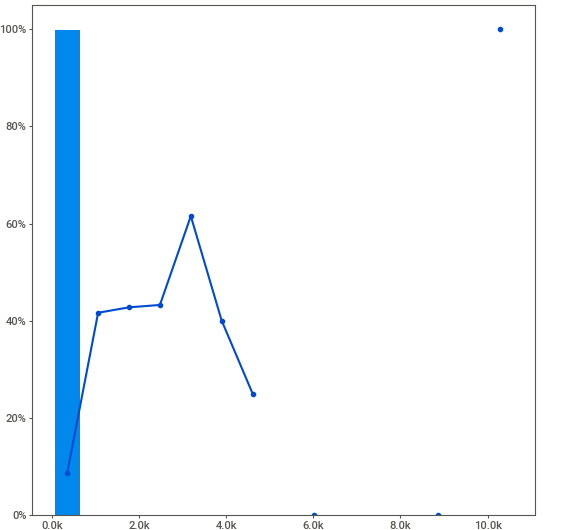
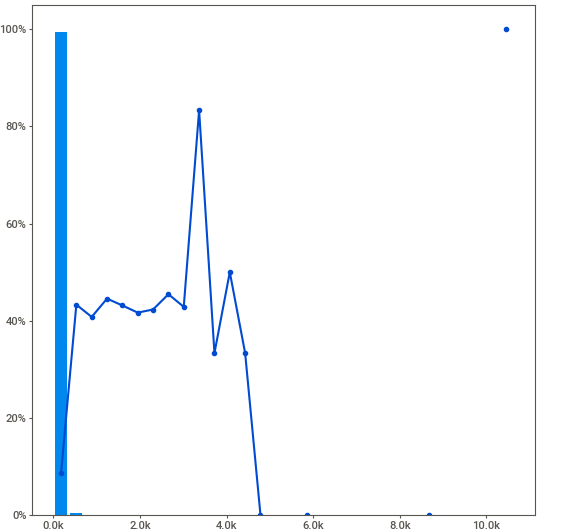
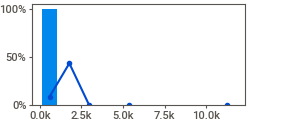
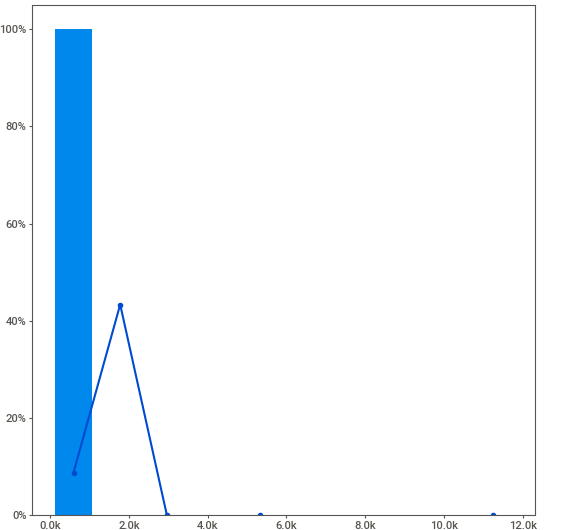
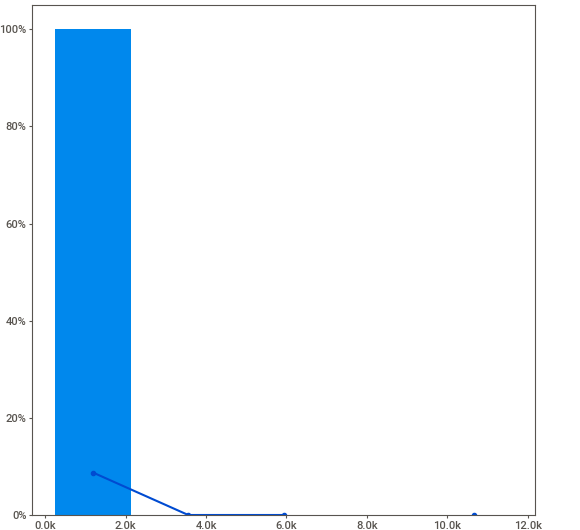
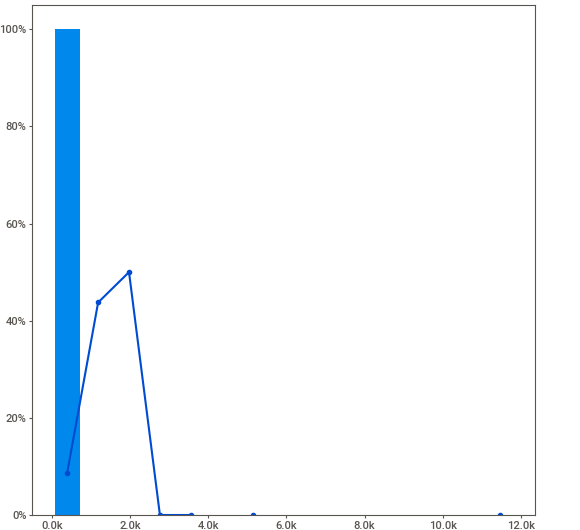
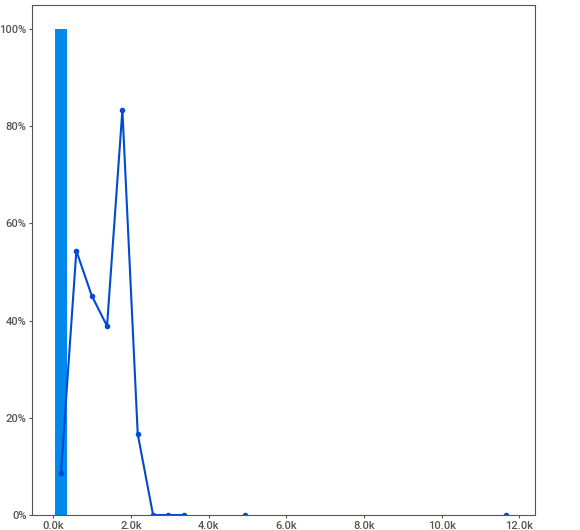
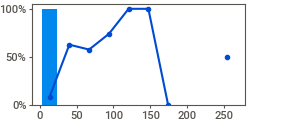
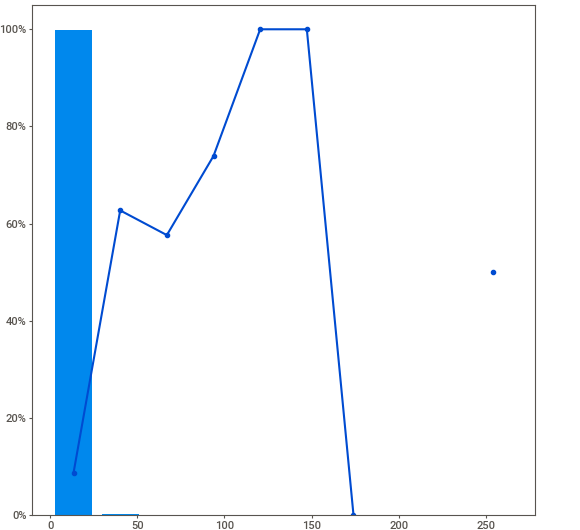
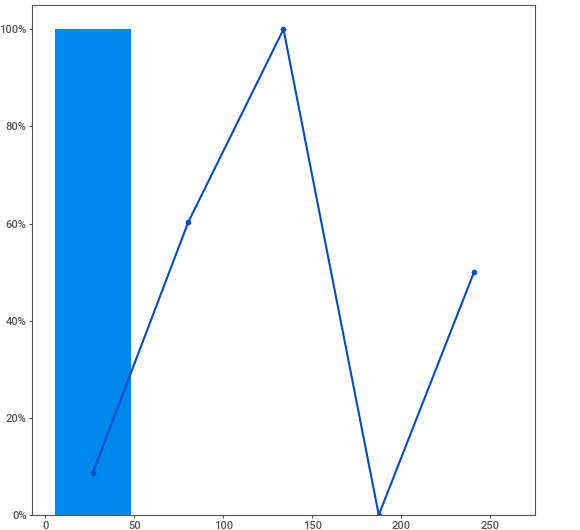
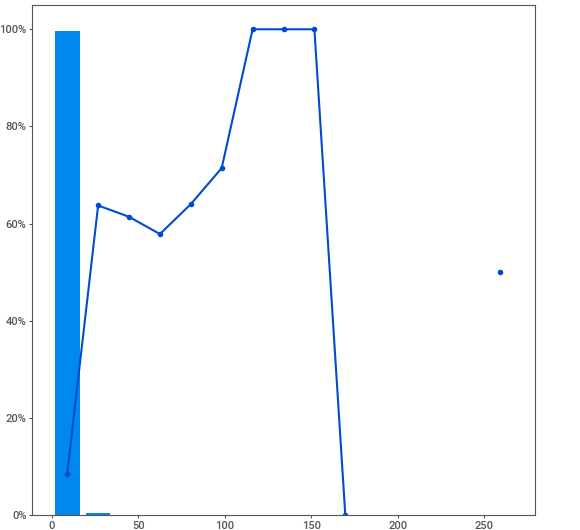
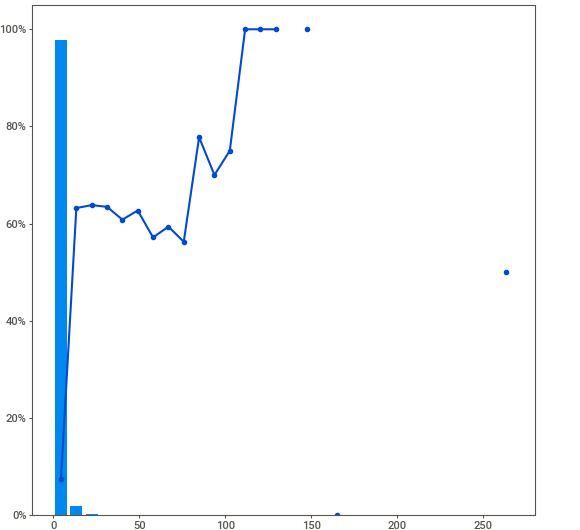
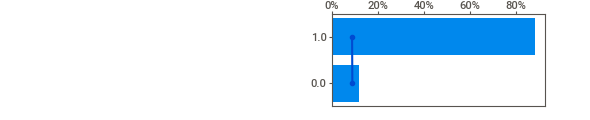
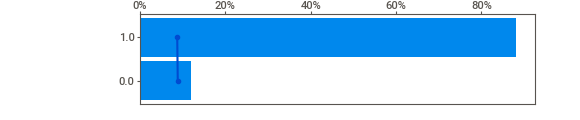
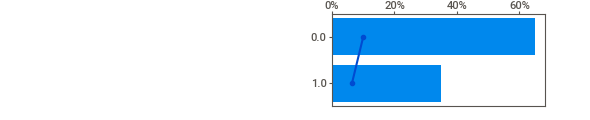
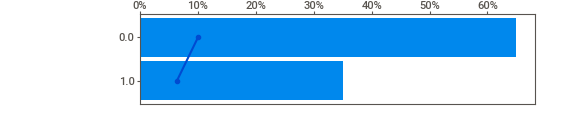
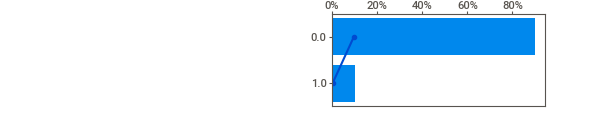
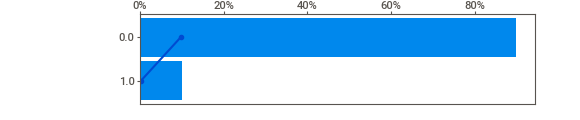
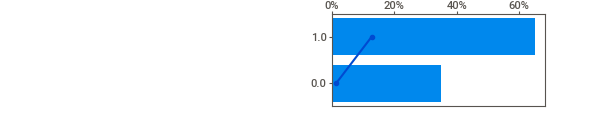
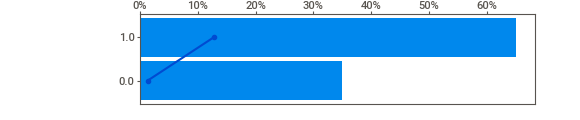
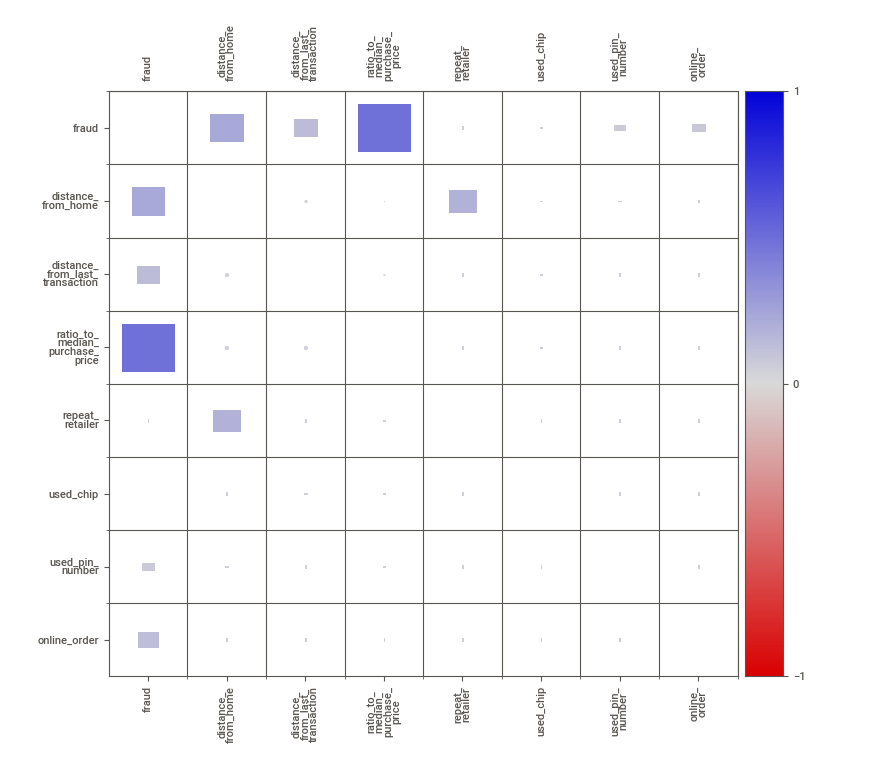
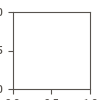

In [ ]:
relatorio.show_notebook()

In [ ]:
!pip install pandas-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 22.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bd157a34aa918c6935c438a86df6e8fba33b73d94be2c62c25f0cd42a21f710e
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: 

In [ ]:
from pandas_profiling import ProfileReport

# Supondo que o DataFrame seja 'df'
profile = ProfileReport(df, title="Relatório de Análise Exploratório", explorative=True)

# Gerar o relatório em HTML
profile.to_file("relatorio_exploratorio.html")

AttributeError: module 'numba' has no attribute 'generated_jit'

# **4. Pré-Processamento**

- Tratamento dos dados para aplicar modelos de Machine Learning



- Transformar dados categóricos em numéricos
- Tratar Dados faltantes
- Tratar dados numéricos
- Validação

# **5.Modelagem**

- Que tipo de problema será resolvido, classificação ou regressão?
- Qual algoritmo pode ser utilizado para isso

# **6. Avaliação**

- Quais métricas podemos utilizar
- Quais conclusões sobre as métricas,visão técnica e negócio

# **7. Conclusão**

- Quais são seus principais resultados